Name:Komal Mahesh Chitnis

Roll No:26

Moodle ID:20102068

BE COMPS DIV A

# **Exp. 10: PCA**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML_Datasets/MNIST_data(1).csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3624,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


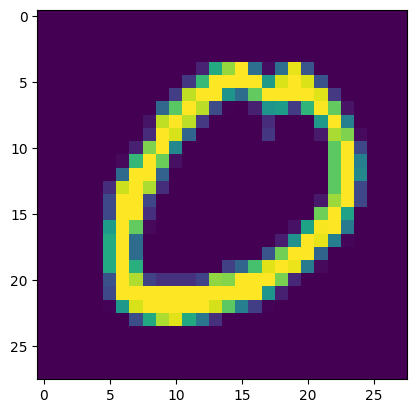

In [6]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()

In [12]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [13]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time() - start)

15.144376516342163


In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)

In [18]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [19]:
X_train_trf.shape

(33600, 100)

In [20]:
knn = KNeighborsClassifier()

In [21]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test_trf)

In [23]:
accuracy_score(y_test,y_pred)

0.9539285714285715

In [29]:
for i in range(1,10):
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)

    knn = KNeighborsClassifier()

    knn.fit(X_train_trf,y_train)

    y_pred = knn.predict(X_test_trf)

    print(accuracy_score(y_test,y_pred))

0.25976190476190475
0.3238095238095238
0.51
0.6660714285714285
0.7377380952380952
0.8227380952380953
0.8439285714285715
0.8716666666666667
0.8866666666666667


In [30]:
# transforming to a 2D coordinate system
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [31]:
X_train_trf

array([[-2.71866209, -0.4895859 ],
       [-0.67699434, -6.7536477 ],
       [-3.03315022,  6.50907911],
       ...,
       [ 2.14886098,  0.78069323],
       [ 1.0595491 ,  0.94794326],
       [17.70257559,  1.96187646]])

In [32]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [33]:
# transforming in 3D
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [34]:
X_train_trf

array([[-2.71862856, -0.48984496,  1.13548112],
       [-0.67699119, -6.75372184, -2.33603222],
       [-3.03323675,  6.50980204,  7.49202684],
       ...,
       [ 2.14881904,  0.78073128, -0.74733789],
       [ 1.05958992,  0.9477515 ,  3.9500584 ],
       [17.70260369,  1.96210158, -4.94321883]])

In [35]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()